# Rock, Paper, Scissor

## Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data

In [2]:
rock_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps\rps\rock')
paper_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps\rps\paper')
scissors_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps\rps\scissors')

validation_rock_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps-test-set\rps-test-set\rock')
validation_paper_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps-test-set\rps-test-set\paper')
validation_scissors_dir = os.path.join(r'D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps-test-set\rps-test-set\scissors')

In [3]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840
total validation rock images: 124
total validation paper images: 124
total validation scissors images: 124


In [4]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')
])

## Model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps\rps"
    
validation_dir = r"D:\hrutik\Documents\Projects\Rock, Paper, Scissor\rps-test-set\rps-test-set"

train_datagen = ImageDataGenerator( rescale = 1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode = 'nearest')

# here we are appling some image augmentation parameters, so that our model can train better. 

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 126,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 126,
                                                         class_mode = 'categorical',
                                                         target_size = (150, 150))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = 20,
                              epochs = 15,
                              validation_steps = 3,
                              verbose = 1)

Epoch 1/15
20/20 [==============================] - 82s 4s/step - loss: 1.5741 - accuracy: 0.3466 - val_loss: 1.0921 - val_accuracy: 0.3441
Epoch 2/15
20/20 [==============================] - 79s 4s/step - loss: 1.1197 - accuracy: 0.3730 - val_loss: 0.9672 - val_accuracy: 0.5618
Epoch 3/15
20/20 [==============================] - 76s 4s/step - loss: 1.0436 - accuracy: 0.4697 - val_loss: 1.0062 - val_accuracy: 0.4758
Epoch 4/15
20/20 [==============================] - 76s 4s/step - loss: 1.0037 - accuracy: 0.4798 - val_loss: 0.7003 - val_accuracy: 0.7984
Epoch 5/15
20/20 [==============================] - 76s 4s/step - loss: 1.0525 - accuracy: 0.5466 - val_loss: 0.6276 - val_accuracy: 0.6640
Epoch 6/15
20/20 [==============================] - 78s 4s/step - loss: 0.8358 - accuracy: 0.6267 - val_loss: 0.5255 - val_accuracy: 0.8414
Epoch 7/15
20/20 [==============================] - 76s 4s/step - loss: 0.6992 - accuracy: 0.7166 - val_loss: 0.3945 - val_accuracy: 0.9194
Epoch 8/15
20/20 [==

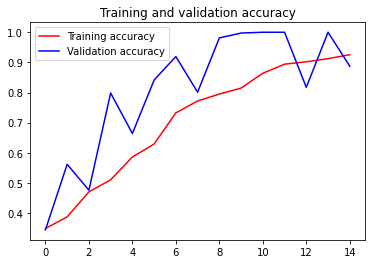

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()